# 用 Python 学习数字图像处理
## 3. 图像数据类型及颜色空间转换
参考：[python数字图像处理（4）：图像数据类型及颜色空间转换](http://www.cnblogs.com/denny402/p/5122328.html)

### 图像数据类型及转换
在 `skimage` 中，一幅图像就是一个 NumPy 数组，数组的数据类型有以下几种：
<table class="docutils" style="height: 198px; width: 533px;" border="1"><colgroup><col width="21%" /><col width="79%" /></colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Data type</th><th class="head">Range</th></tr>
</thead>
<tbody valign="top">
<tr class="row-even">
<td>uint8</td>
<td>0 to 255</td>
</tr>
<tr class="row-odd">
<td>uint16</td>
<td>0 to 65535</td>
</tr>
<tr class="row-even">
<td>uint32</td>
<td>0 to 232</td>
</tr>
<tr class="row-odd">
<td>float</td>
<td>-1 to 1 or 0 to 1</td>
</tr>
<tr class="row-even">
<td>int8</td>
<td>-128 to 127</td>
</tr>
<tr class="row-odd">
<td>int16</td>
<td>-32768 to 32767</td>
</tr>
<tr class="row-even">
<td>int32</td>
<td>-231&nbsp;to 231&nbsp;- 1</td>
</tr>
</tbody>
</table>

一幅图像默认的数据类型为 `uint8`，像素值范围为 $[0, 255]$。将一幅彩色图像转换为灰度图像后，它的数据类型会从 `uint8` 变为 `float`。`float` 类型的范围在 $[-1, 1]$ 或 $[0, 1]$ 之间。

In [1]:
from skimage import io, data, img_as_float, img_as_ubyte, color
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# 查看图像（数组）的数据类型
img = data.chelsea()
print(img.dtype.name)

uint8


**例1：**`unit8` 转 `float`

In [3]:
img = data.chelsea()
print(img.dtype.name)
# 利用 img_as_float 函数，将 uint8 类型转换为 float 类型
dst = img_as_float(img)
print(dst.dtype.name)

uint8
float64


**例2：**`float` 转 `uint8`  
需要注意，`float` 转为 `uint8`，有可能会造成数据的损失，因此会有警告提醒。

In [4]:
img = np.array([0, 0.5, 1], dtype=float)
print(img.dtype.name)
dst = img_as_ubyte(img)
print(dst.dtype.name)

float64
uint8


/anaconda/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


除了上面两个例子的常用转换外，还有一些其他的类型转换。如下表：
<table class="docutils" border="1"><colgroup><col width="28%" /><col width="72%" /></colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Function name</th><th class="head">Description</th></tr></thead>
<tbody valign="top">
<tr class="row-even">
<td>img_as_float</td>
<td>Convert to 64-bit floating point.</td>
</tr>
<tr class="row-odd">
<td>img_as_ubyte</td>
<td>Convert to 8-bit uint.</td>
</tr>
<tr class="row-even">
<td>img_as_uint</td>
<td>Convert to 16-bit uint.</td>
</tr>
<tr class="row-odd">
<td>img_as_int</td>
<td>Convert to 16-bit int.<br /><br /></td>
</tr>
</tbody>
</table>

### 颜色空间及其转换
如前所述，除了直接转换可以改变数据类型外，还可以通过图像的颜色空间转换来改变数据类型。

常用的颜色空间有灰度空间、RGB 空间、HSV 空间和 CMYK 空间。颜色空间转换以后，图片类型都变成了 `float` 型。所有的颜色空间转换函数，都放在 `skimage` 的 `color` 模块内。

**例3：**RGB 转灰度图

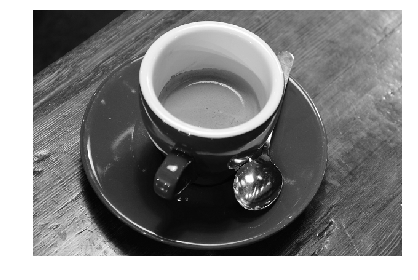

In [5]:
img = data.coffee()
gray = color.rgb2gray(img)
io.imshow(gray)
plt.axis("off")
io.show()

其他的转换用法相似，常用的如下：
```python
skimage.color.rgb2grey(rgb)

skimage.color.rgb2hsv(rgb)

skimage.color.rgb2lab(rgb)

skimage.color.gray2rgb(image)

skimage.color.hsv2rgb(hsv)

skimage.color.lab2rgb(lab)
```

实际上，上面所有的转换函数都可以用一个函数来代替：
```python
skimage.color.convert_colorspace(arr, fromspace, tospace)
```
表示将 `arr` 从 `fromspace` 颜色空间转换到 `tospace` 颜色空间。

**例4：**RGB 转 HSV

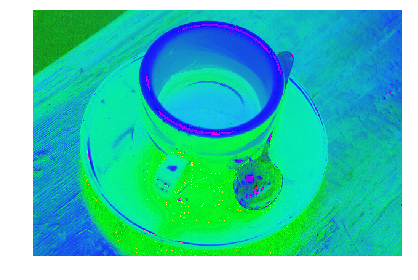

In [6]:
img_rgb = data.coffee()
img_hsv = color.convert_colorspace(img_rgb, 'RGB', 'HSV')
io.imshow(img_hsv)
plt.axis("off")
io.show()

在 `color` 模块的颜色空间转换函数中，还有一个比较有用的函数是 `skimage.color.label2rgb(arr)`，可以根据标签值对图像进行着色。在图像分类着色时可以利用这个函数。

**例5：**将 coffee 图像的像素值分为三类，然后用默认颜色分别对这三类进行着色

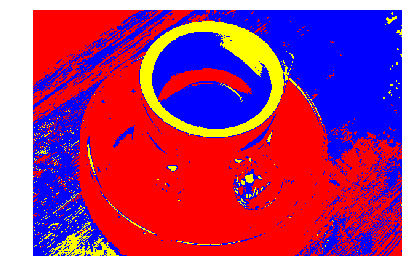

In [7]:
img_rgb = data.coffee()
img_gray = color.rgb2gray(img_rgb)
rows, cols = img_gray.shape
labels = np.zeros(img_gray.shape)
for i in range(rows):
    for j in range(cols):
        if img_gray[i, j] < 0.4:
            labels[i, j] = 0
        elif img_gray[i, j] < 0.75:
            labels[i, j] = 1
        else:
            labels[i, j] = 2
            
img_dst = color.label2rgb(labels)
io.imshow(img_dst)
plt.axis("off")
io.show()